# Call Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


import warnings
warnings.filterwarnings("ignore")

# Data Understanding and Cleaning

* Load the Data:


In [2]:
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

* Explore the Dataset

In [3]:
print("Display the first few row of the dataset")
data.head(10)

Display the first few row of the dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
print(f"The Dimensions of the dataset : {data.shape}")

The Dimensions of the dataset : (200, 5)


In [5]:
print("Dimensions of the dataset")
data.dtypes

Dimensions of the dataset


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
print("Column names")
data.columns

Column names


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

* Summary Statistics:

In [7]:
print("Summary statistics for numerical columns")
data.describe()

Summary statistics for numerical columns


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
print(f"Frequency distributions for categorical columns ")
data['Gender'].value_counts()

Frequency distributions for categorical columns 


Gender
Female    112
Male       88
Name: count, dtype: int64

* Visualizations

(array([[ 20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.],
        [ 17., 105.,  61.,  17.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 16.,  34.,  48.,  64.,  24.,  10.,   4.,   0.,   0.,   0.],
        [ 36.,  27.,  75.,  32.,  30.,   0.,   0.,   0.,   0.,   0.]]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <a list of 4 BarContainer objects>)

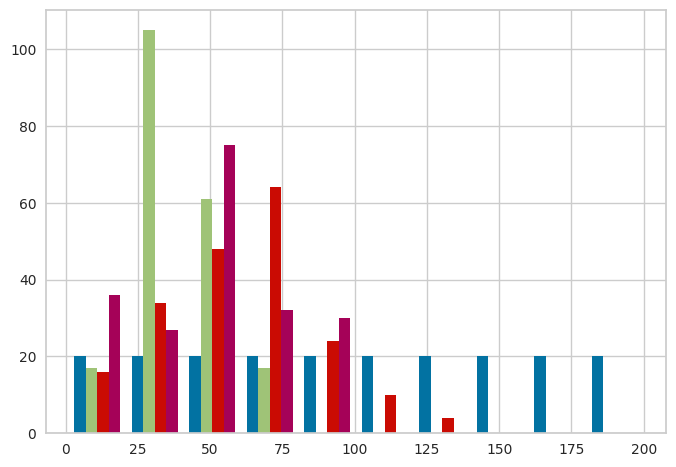

In [9]:
# Histogram for a numericale variable
int_columns = data.select_dtypes(include=['int'])

plt.hist(int_columns , bins=10)


In [10]:
def hist_plot(col, num):
    plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, num)
    sns.histplot(data[col], kde=True)
    plt.title(f"{col}")
    plt.xlabel(f"{col}")

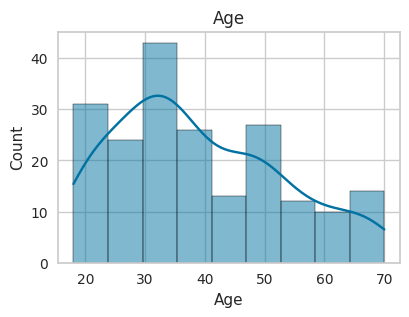

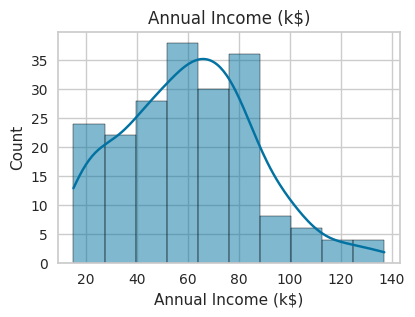

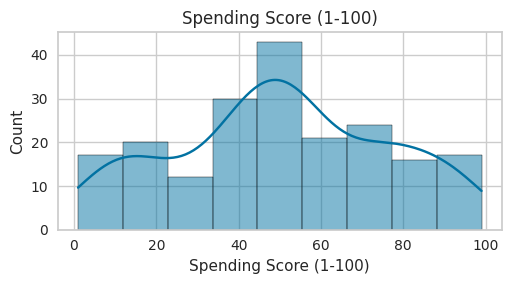

In [11]:
hist_plot('Age', 1)
hist_plot('Annual Income (k$)', 2)
hist_plot('Spending Score (1-100)', 3)

plt.tight_layout()
plt.show()

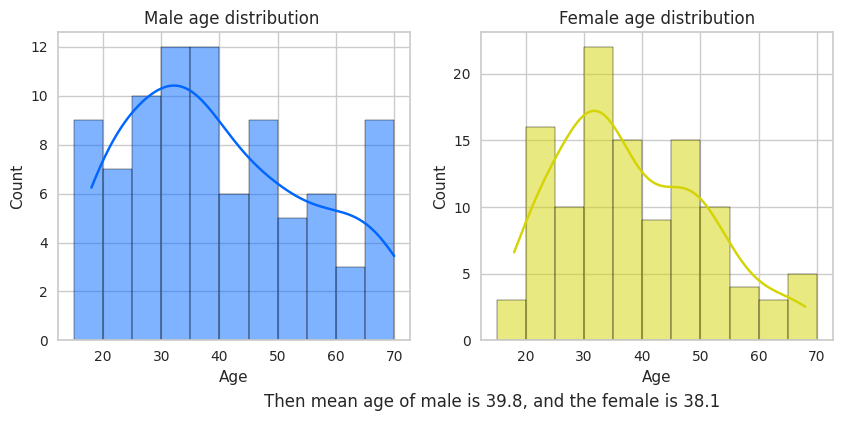

In [12]:
# Distribution of age with respect to gender
male = data[data.Gender == "Male"]["Age"]
female = data[data.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='#0066ff', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");
plt.text(-25,-5,f"Then mean age of male is {round(male.mean(),1)}, and the female is {round(female.mean(),1)}")

plt.show()

* To plot a Categorical feature ("Gender")

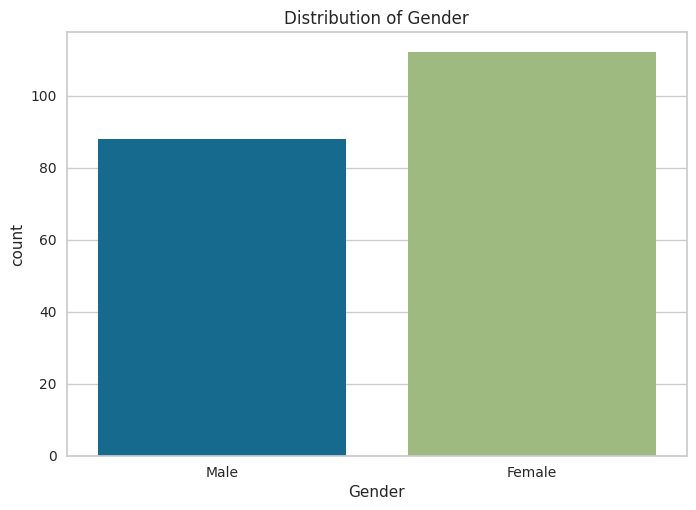

In [13]:
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

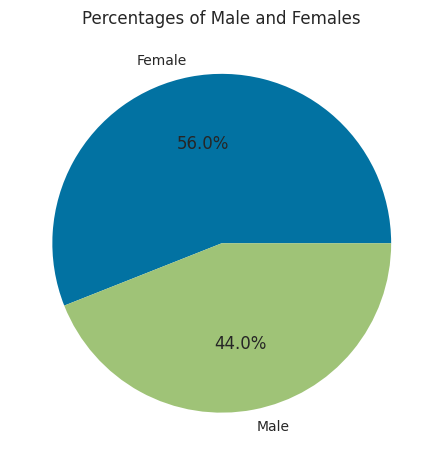

In [14]:
plt.pie(data.Gender.value_counts(), labels = ['Female', 'Male'], autopct ="%.01f%%")
plt.title('Percentages of Male and Females' );

* Check for missing values 

In [15]:
print(f"Number of missing values \n")
print(data.isnull().sum())

Number of missing values 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


* Check for duplicates

In [16]:
print("Check for duplicate rows")
data.duplicated().sum()

Check for duplicate rows


0

* Checking the Outliers in the dataset

<Axes: >

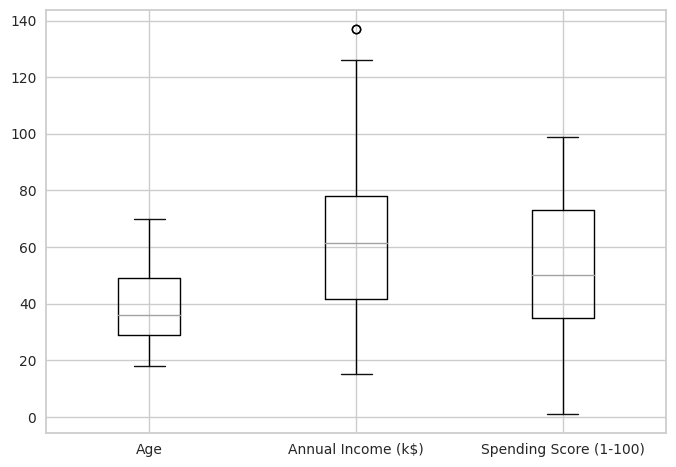

In [17]:
data.iloc[:,1:].boxplot()

* Data Scaling and Standardization

In [18]:
int_lable = ["Age","Annual Income (k$)","Spending Score (1-100)"]

# Assuming data is your DataFrame
scaler = StandardScaler()
data[int_lable] = scaler.fit_transform(data[int_lable])

# Encoder Categorical Variables

In [19]:
label_encoder = LabelEncoder()

data["Gender_encoder"] = label_encoder.fit_transform(data["Gender"])

In [20]:
data = data.drop("CustomerID",axis=1)
data = data.drop("Gender",axis=1)


In [21]:
print("Data after the Scaling  and encoder")
data.head()

Data after the Scaling  and encoder


,Age,Annual Income (k$),Spending Score (1-100),Gender_encoder
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


# Model Training 

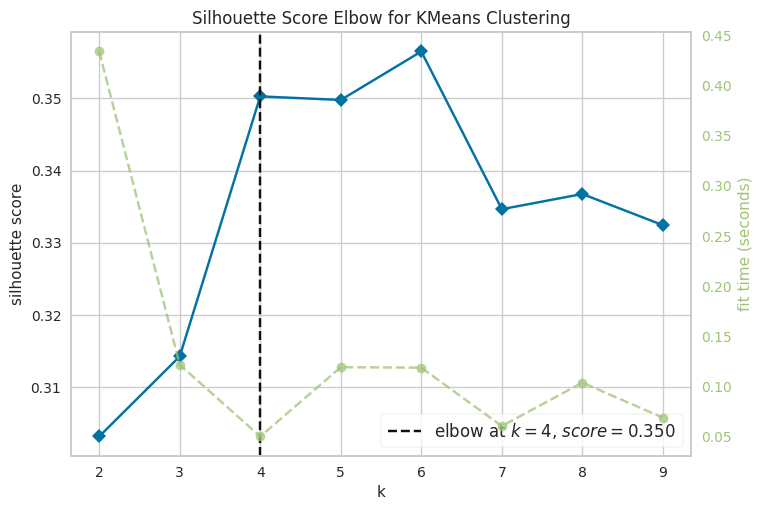

In [22]:
KM_model = KMeans(random_state = 42)
visualise = KElbowVisualizer(KM_model, k = (2, 10), metric = "silhouette")

visualise.fit(data)
visualise.show()
plt.show()

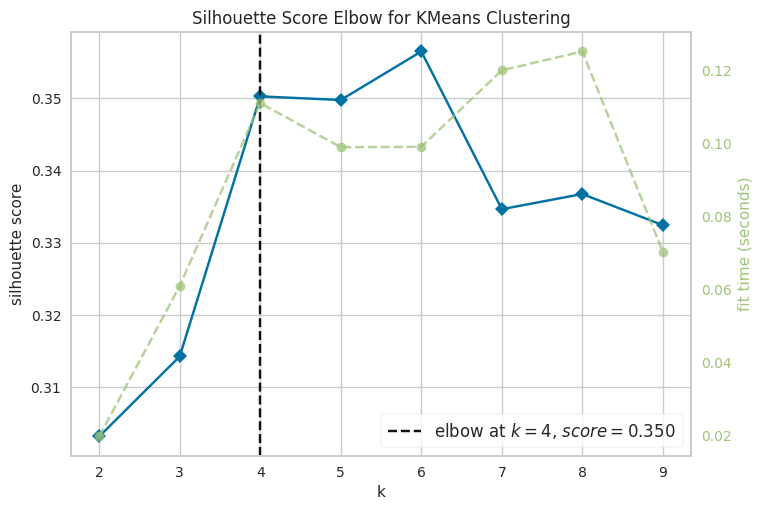

In [23]:
visualise = KElbowVisualizer(KM_model, k = (2, 10), metric = "silhouette")

visualise.fit(data)
visualise.show()
plt.show()

In [24]:
cluster_5 = KMeans(n_clusters = 4)
cluster_5.fit(data)

cluster_label_5 = cluster_5.predict(data)

silh_5 = silhouette_score(data, cluster_label_5)
print("Silhouette Score  of 4 clusters:", silh_5)

KM_5 = data.copy()
KM_5.loc[:,'Cluster'] = cluster_5.labels_

Silhouette Score  of 4 clusters: 0.3502702043465398
